In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import sys
sys.path.append("../BBTRE_physics_analysis/") 

In [8]:
import numpy as np
import dask
import xarray as xr
from xmitgcm import open_mdsdataset 
from xhistogram.xarray import histogram

from osse import *
from canyon_utils import *
from sloped_MITgcm import *

In [9]:
# Constant parameters

Γ = 0.0008613659531090722
N = np.sqrt(g*α*Γ)
θ = 1.26E-3
f = -5.3e-5

h = 230
k0 = 5.2e-5
k1 = 1.8e-3

dx = 600.; dy = 600.
delta_t = 30.

In [12]:
data_dir = f"../../MITgcm/experiments/rotated_BBTRE_canyon-tracer/run/"
ds = open_mdsdataset(data_dir,ignore_unknown_vars=True,prefix=["tracer01Diag", "tracer02Diag", "tracer03Diag"], delta_t=delta_t)
ds = ds.sel(time=ds['time'][1:])
ds = periodic_extend(ds, ['XC', 'XG'], dx, [-1,0])
xslice = [500, 500+800]
ds = ds.isel(XC=slice(*xslice), XG=slice(*xslice))
ds, grid = add_rotated_coords(ds, θ)

# Cross-canyon integral

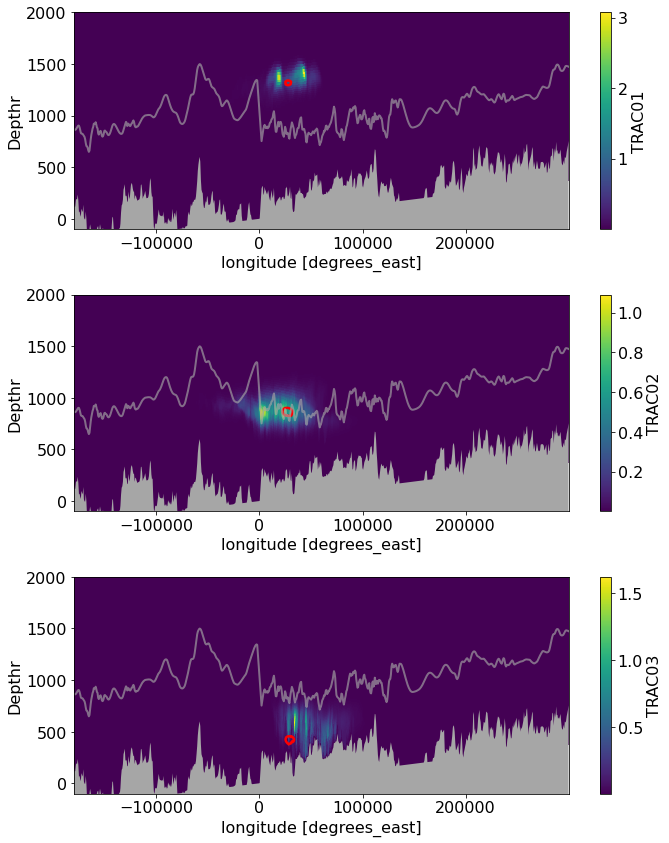

In [13]:
plt.figure(figsize=(10,12))
for tr in [1,2,3]:
    plt.subplot(3,1,tr)
    ds[f'TRAC0{tr}'] = ds[f'TRAC0{tr}'].where(ds[f'TRAC0{tr}']>1.e-10, 1.e-10)
    (ds[f'TRAC0{tr}'].isel(time=-1).sum('YC', skipna=True)).plot(x='Xr', y='Zr', cmap=cmap) #norm=matplotlib.colors.LogNorm(vmin=1.e-3, vmax=1.0)
    ds[f'TRAC0{tr}'].isel(time=0).isel(YC=46).plot.contour(levels=[0.3], colors='r', linewidths=2.5)
    plt.fill_between(ds['XC'], 0*ds['XC']-500, (ds.attrs['H'] - ds['Depthr'].max('YC')), facecolor=nancol)
    (ds.attrs['H'] - ds['Depthr']).isel(YC=np.arange(-25,25,1)).mean('YC').plot(color=nancol, lw=2.0, alpha=0.65)
    plt.ylim([-100, 2000])
plt.tight_layout()

# Cross-canyon integral (logarithmic colormap)

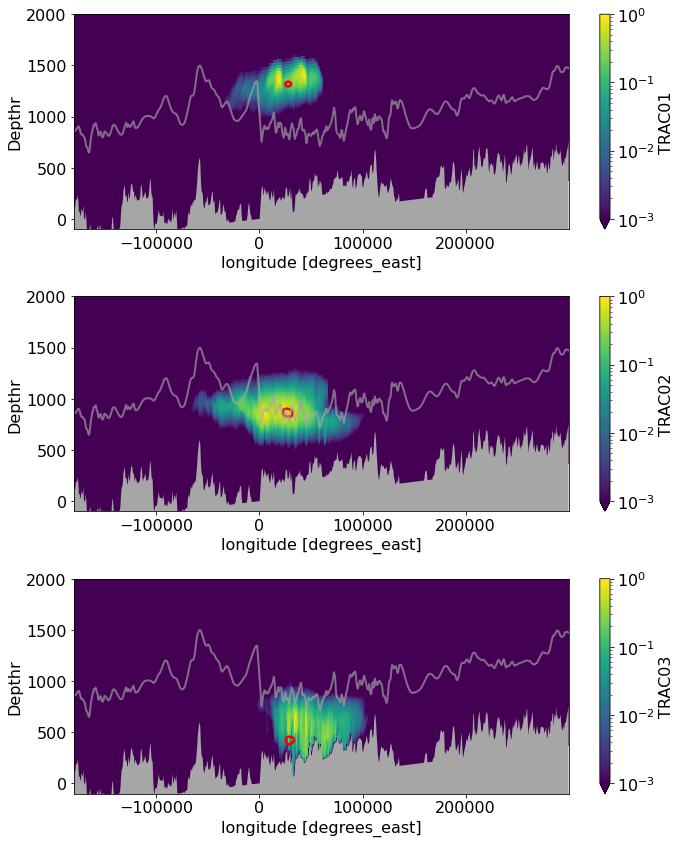

In [19]:
plt.figure(figsize=(10,12))
for tr in [1,2,3]:
    plt.subplot(3,1,tr)
    ds[f'TRAC0{tr}'] = ds[f'TRAC0{tr}'].where(ds[f'TRAC0{tr}']>1.e-10, 1.e-10)
    trac = (ds[f'TRAC0{tr}'].isel(time=-1).sum('YC', skipna=True))
    (trac/trac.max()).plot(x='Xr', y='Zr', cmap=cmap, norm=matplotlib.colors.LogNorm(vmin=1.e-3, vmax=1.0))
    ds[f'TRAC0{tr}'].isel(time=0).isel(YC=46).plot.contour(levels=[0.3], colors='r', linewidths=2.5)
    plt.fill_between(ds['XC'], 0*ds['XC']-500, (ds.attrs['H'] - ds['Depthr'].max('YC')), facecolor=nancol)
    (ds.attrs['H'] - ds['Depthr']).isel(YC=np.arange(-25,25,1)).mean('YC').plot(color=nancol, lw=2.0, alpha=0.65)
    plt.ylim([-100, 2000])
plt.tight_layout()

# Along-canyon seciton near thalweg

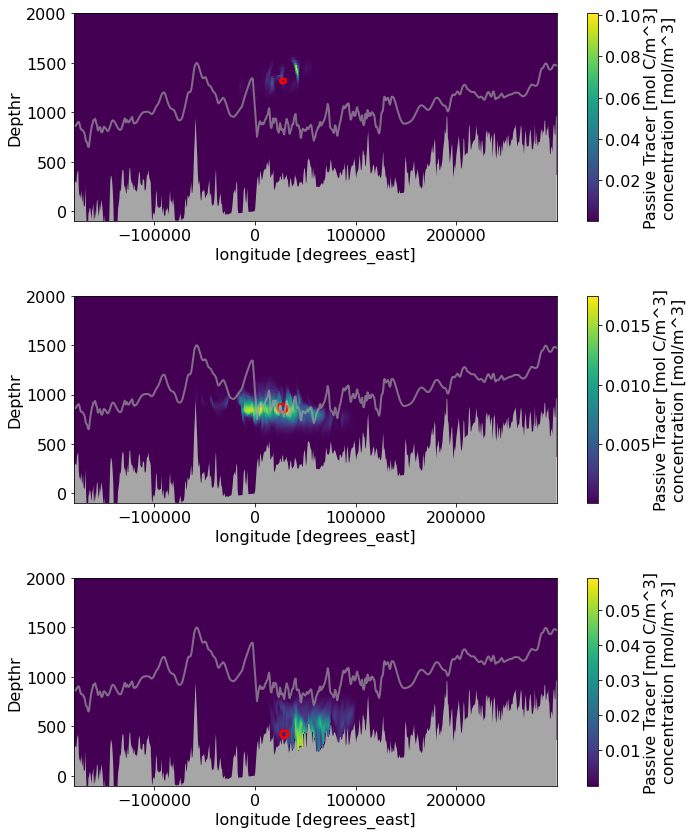

In [17]:
sec = 46

plt.figure(figsize=(10,12))
for tr in [1,2,3]:
    plt.subplot(3,1,tr)
    ds[f'TRAC0{tr}'] = ds[f'TRAC0{tr}'].where(ds[f'TRAC0{tr}']>1.e-10, 1.e-10)
    (ds[f'TRAC0{tr}'].isel(time=-1).isel(YC=sec)).plot(x='Xr', y='Zr', cmap=cmap) #norm=matplotlib.colors.LogNorm(vmin=1.e-3, vmax=1.0)
    ds[f'TRAC0{tr}'].isel(time=0).isel(YC=sec).plot.contour(levels=[0.3], colors='r', linewidths=2.5)
    plt.fill_between(ds['XC'], 0*ds['XC']-500, (ds.attrs['H'] - ds['Depthr'].isel(YC=sec)), facecolor=nancol)
    (ds.attrs['H'] - ds['Depthr']).isel(YC=np.arange(-25,25,1)).mean('YC').plot(color=nancol, lw=2.0, alpha=0.65)
    plt.ylim([-100, 2000])
plt.tight_layout()